# Лабораторная работа 3.

## 1. В соответствии с индивидуальным вариантом загрузить датасет (см. ML 3 semestr datasets) для решения задачи регрессии, выполнить предварительную обработку и разведочный анализ данных (EDA).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('../data/energy_task.csv', parse_dates=['date'], date_format='%d-%m-%Y %H:%M').set_index('date')
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3


In [4]:
df['month'] = df.index.month
df['month'].value_counts()

month
3.0    4440
4.0    4300
2.0    4146
5.0    3839
1.0    2901
Name: count, dtype: int64

In [5]:
df['day'] = df.index.day
df['day'].value_counts()

day
13.0    719
21.0    719
19.0    718
24.0    718
16.0    717
17.0    717
23.0    717
26.0    716
20.0    716
25.0    716
15.0    715
14.0    714
22.0    713
18.0    711
12.0    711
27.0    682
11.0    617
10.0    576
7.0     575
28.0    574
2.0     574
8.0     574
1.0     573
3.0     573
4.0     573
6.0     573
9.0     573
5.0     571
29.0    568
30.0    429
31.0    284
Name: count, dtype: int64

In [6]:
df['hour'] = df.index.hour
df['hour'].value_counts()

hour
12.0    821
16.0    820
23.0    820
8.0     820
11.0    819
18.0    819
17.0    819
21.0    819
2.0     818
15.0    818
14.0    818
22.0    818
13.0    818
20.0    817
0.0     817
6.0     817
4.0     817
3.0     817
1.0     816
9.0     816
10.0    816
19.0    816
5.0     816
7.0     814
Name: count, dtype: int64

In [7]:
df['day_of_week'] = df.index.day_of_week
df['day_of_week'].value_counts()

day_of_week
2.0    2868
3.0    2866
1.0    2862
4.0    2827
0.0    2762
6.0    2722
5.0    2719
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19569 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19654 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19644 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19651 non-null  float64
 14  T7           19681 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19613 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [9]:
df.isna().sum()

Appliances       0
lights           0
T1               0
RH_1             0
T2               0
RH_2           166
T3               0
RH_3             0
T4               0
RH_4            81
T5               0
RH_5            91
T6               0
RH_6            84
T7              54
RH_7             0
T8             122
RH_8             0
T9              84
RH_9             3
T_out          196
Press_mm_hg    128
RH_out         101
Windspeed        0
Visibility      10
Tdewpoint        0
month          109
day            109
hour           109
day_of_week    109
dtype: int64

In [10]:
col_list = list(df)

df.dropna(inplace=True)

In [11]:
df.isna().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
month          0
day            0
hour           0
day_of_week    0
dtype: int64

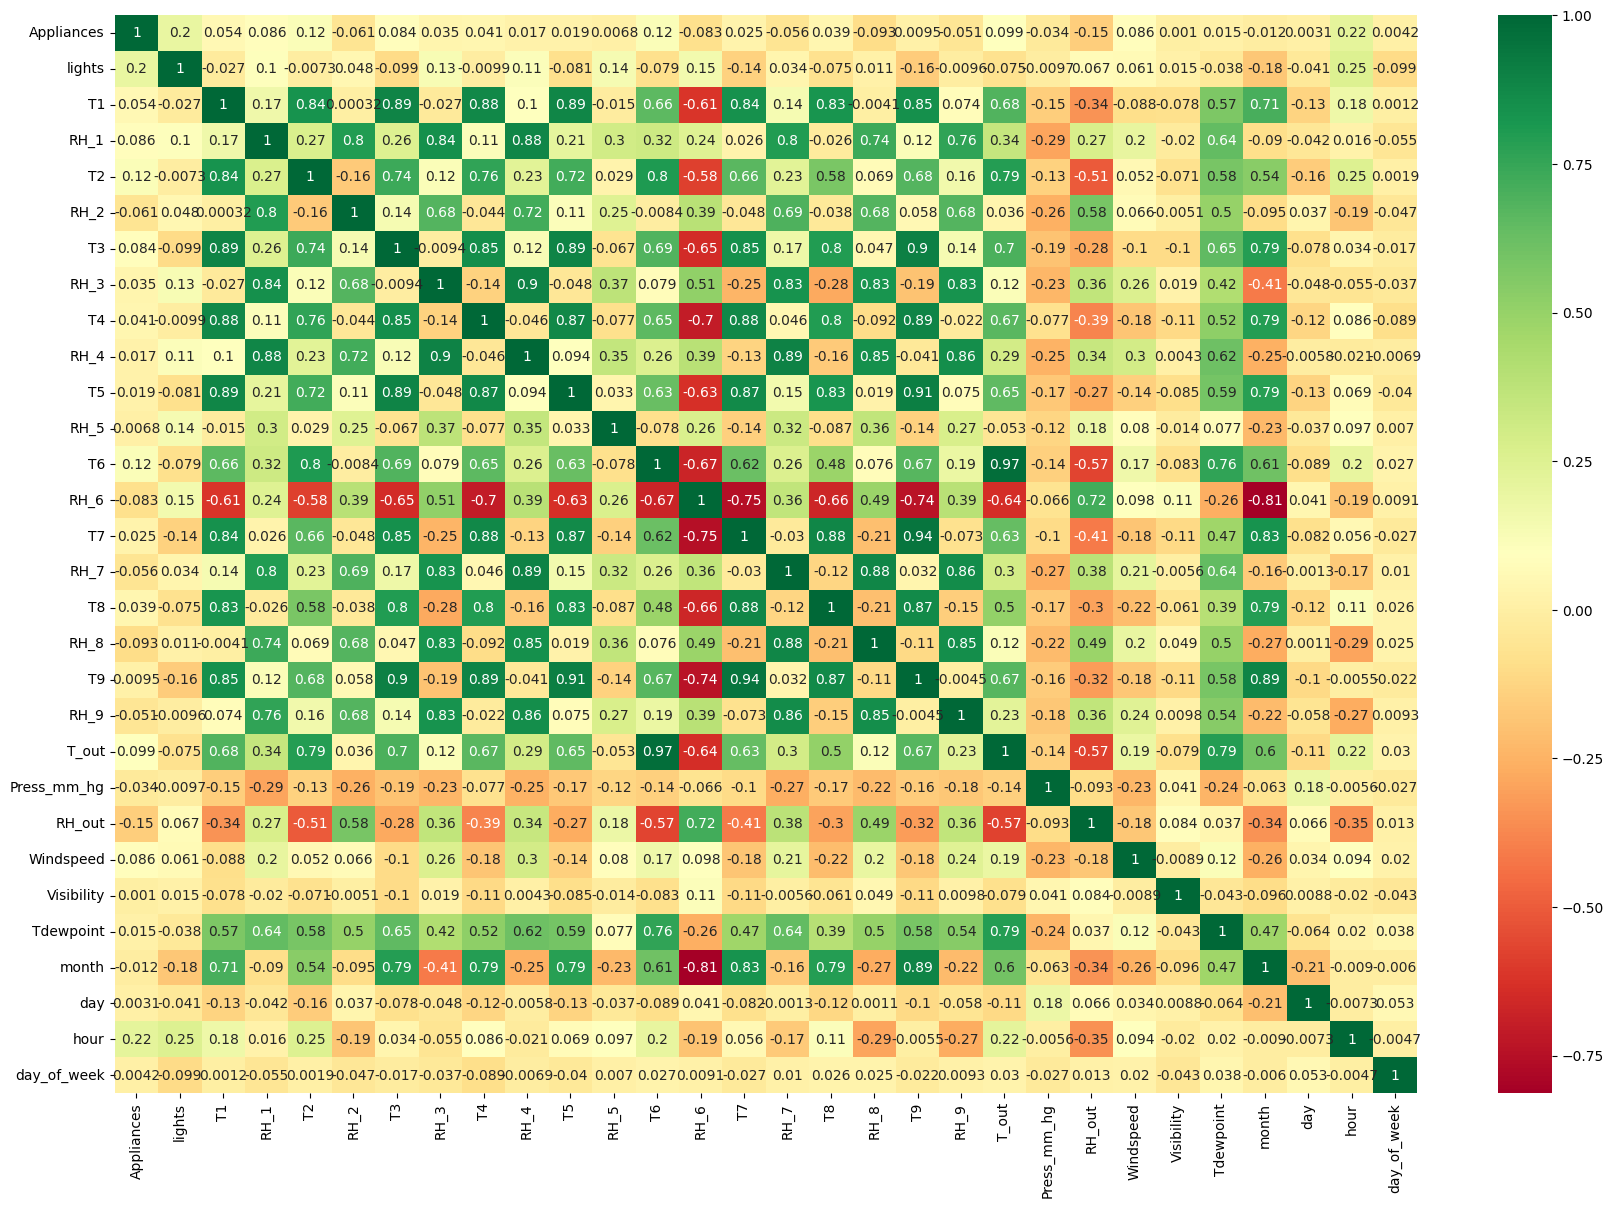

In [12]:
df_corr = df.corr()

plt.figure(figsize=(21, 14))
sns.heatmap(df_corr,  annot=True, cmap="RdYlGn")
plt.show()

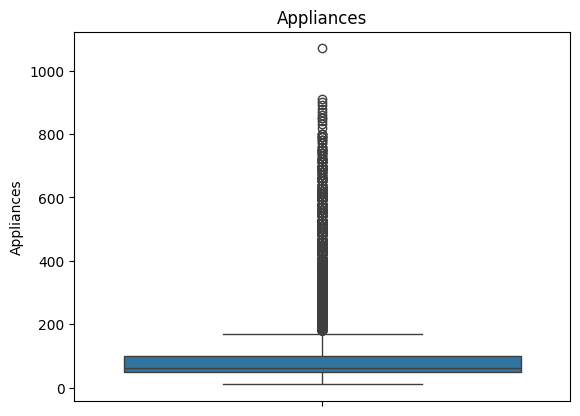

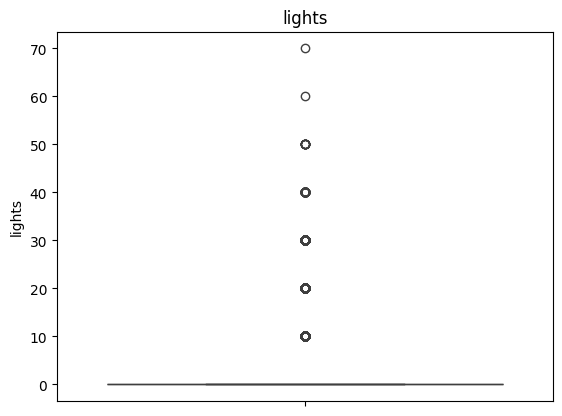

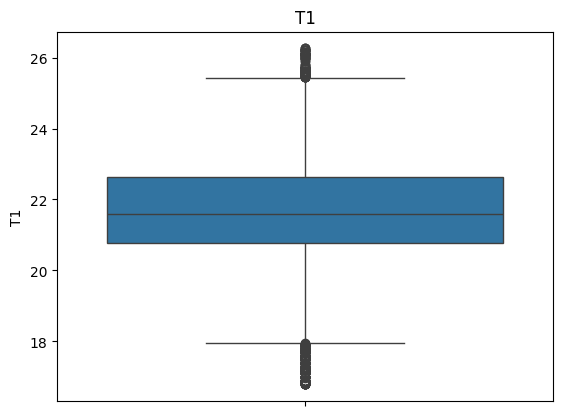

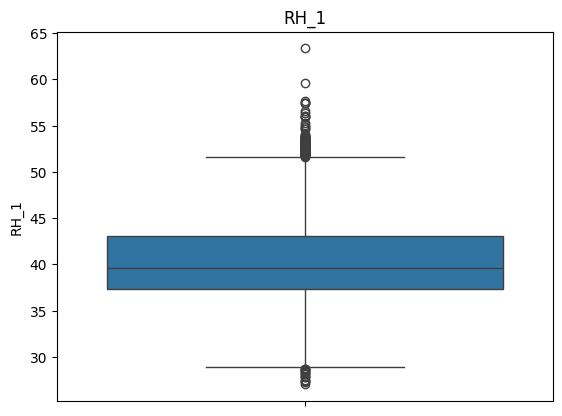

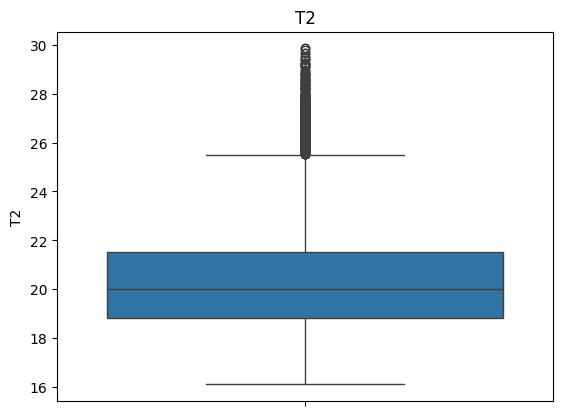

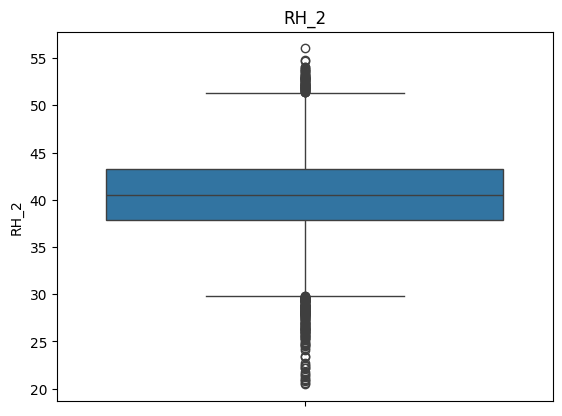

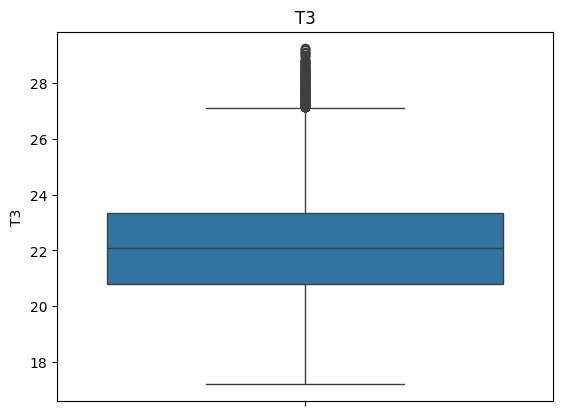

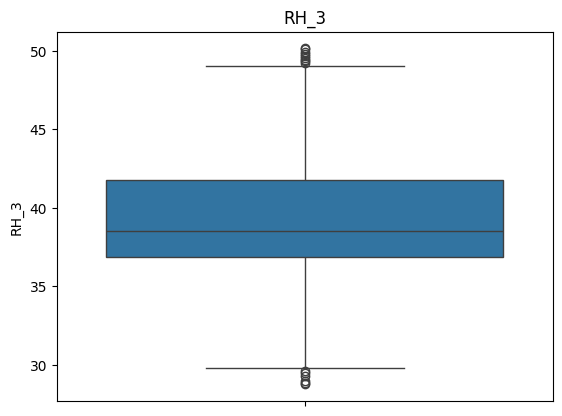

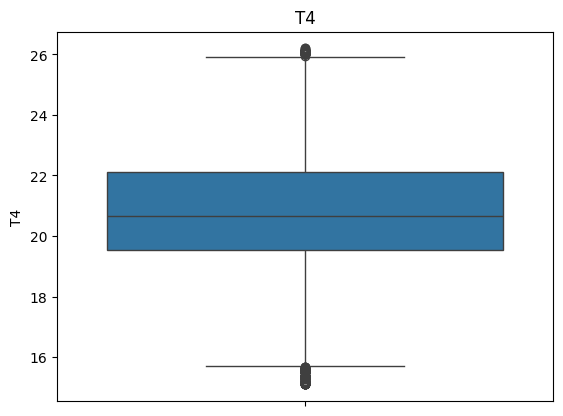

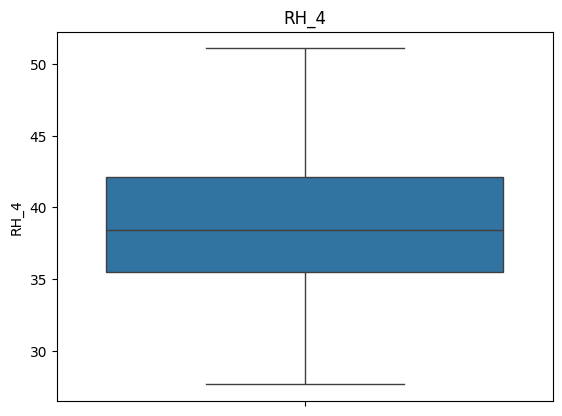

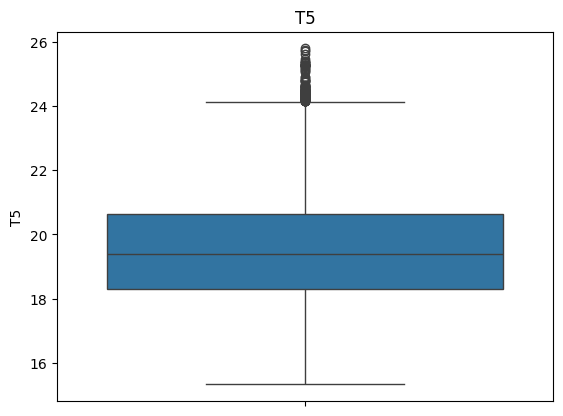

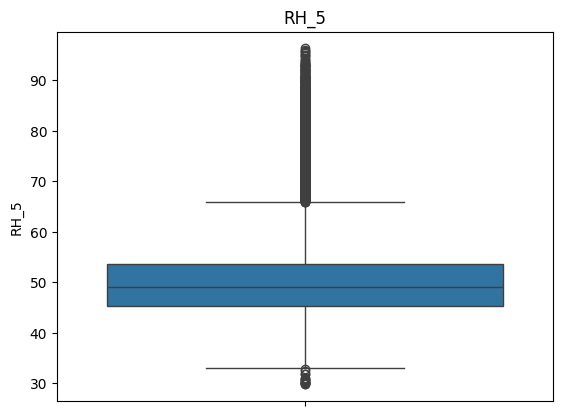

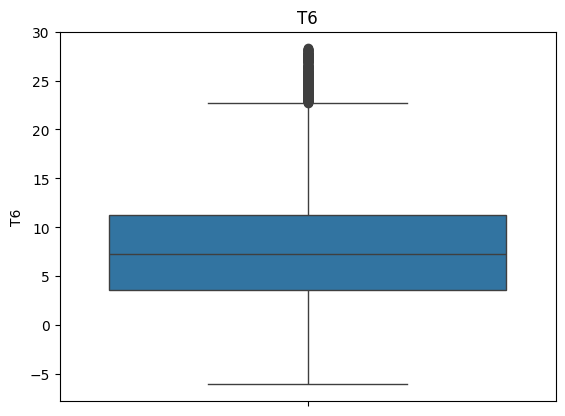

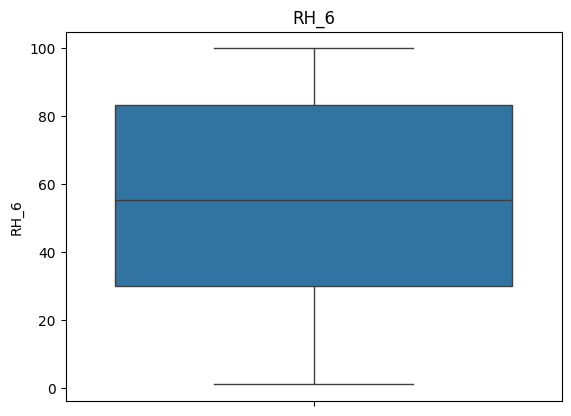

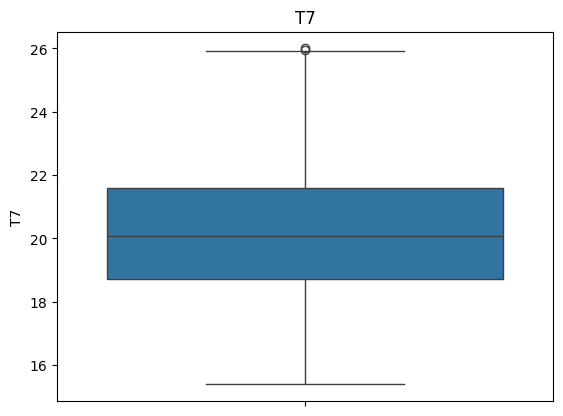

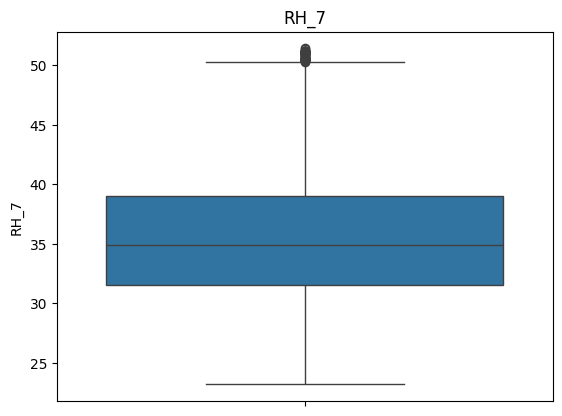

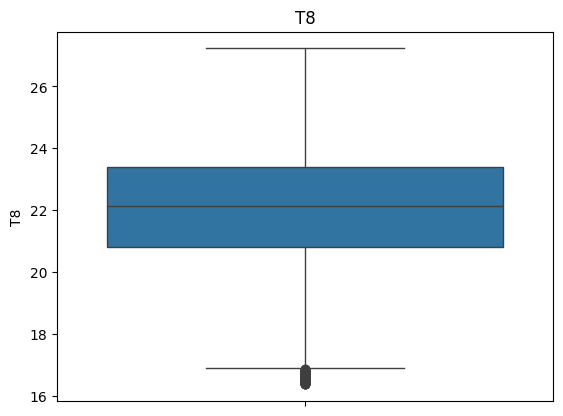

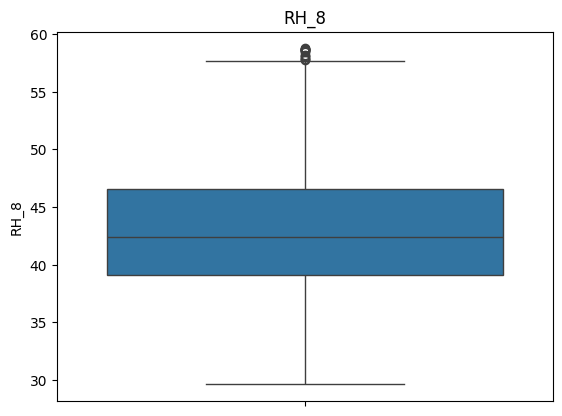

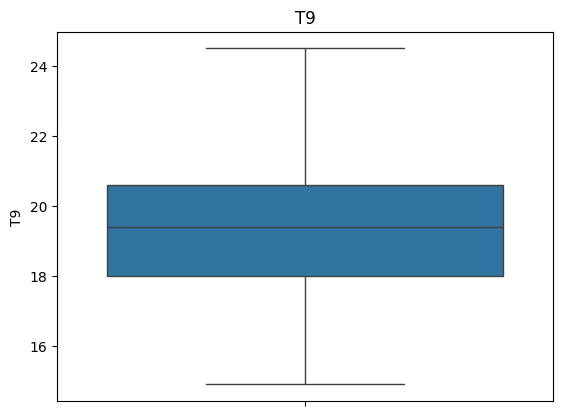

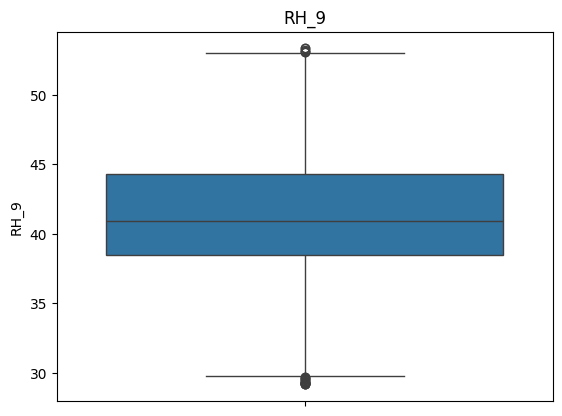

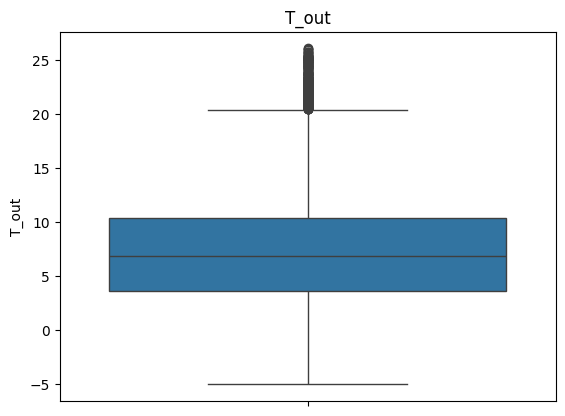

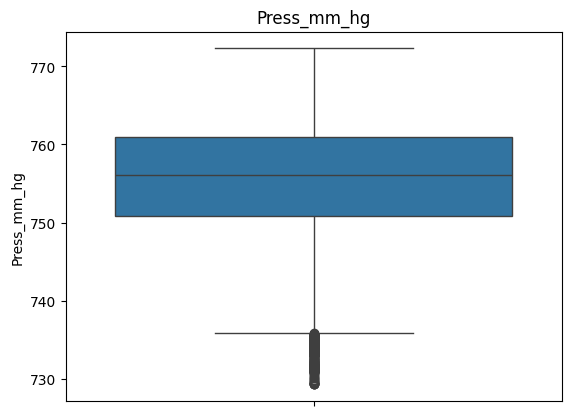

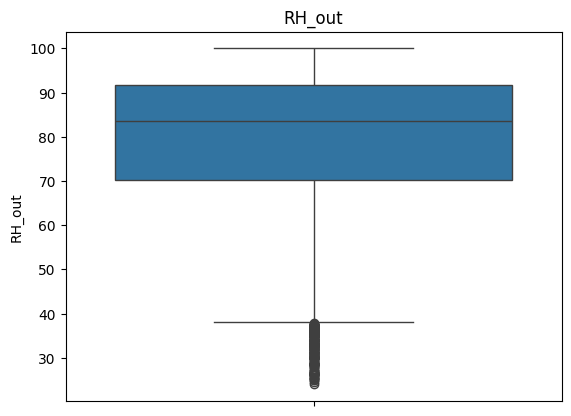

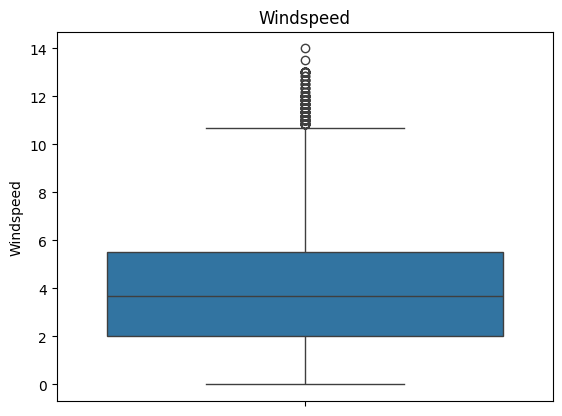

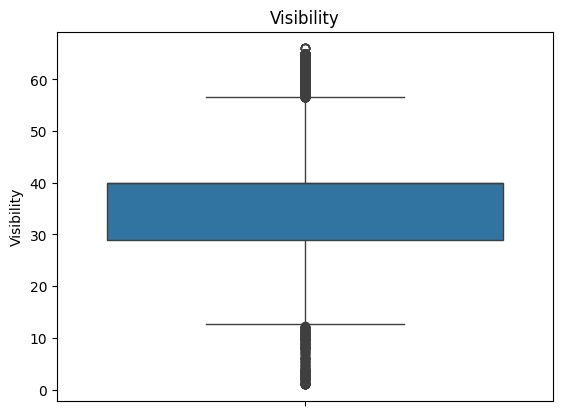

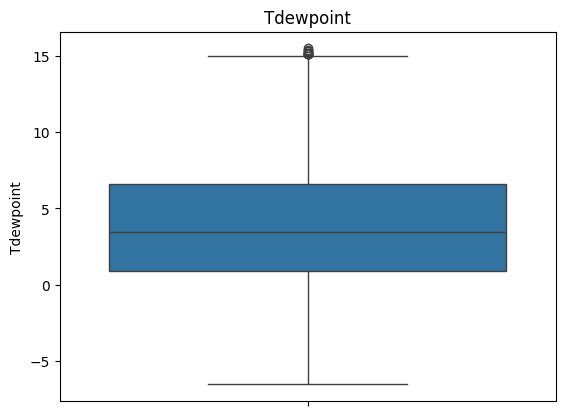

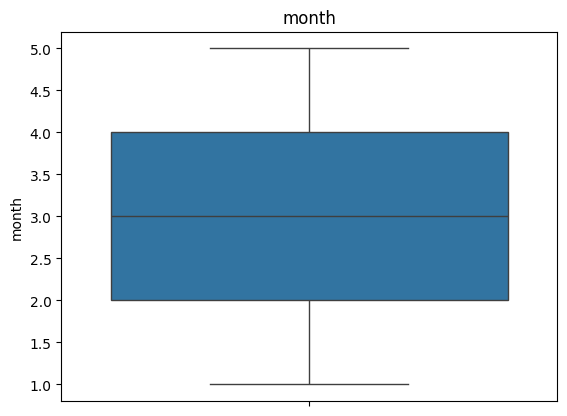

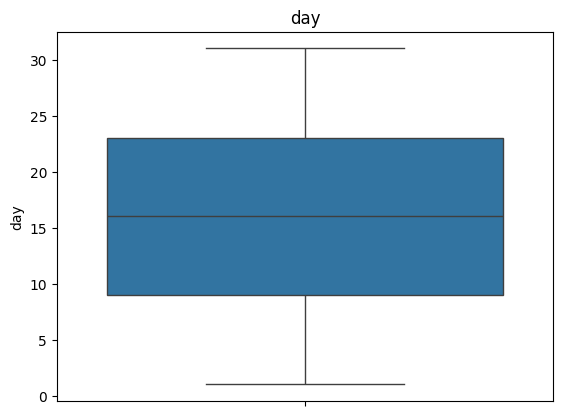

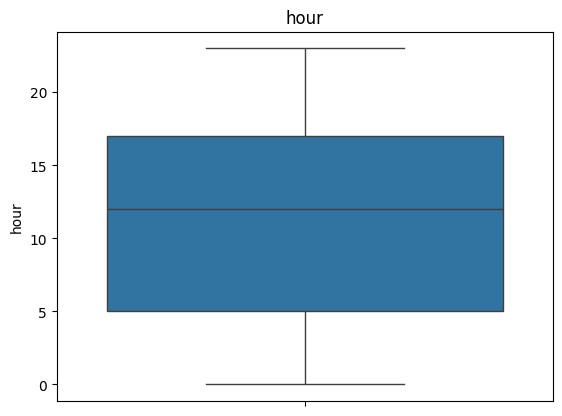

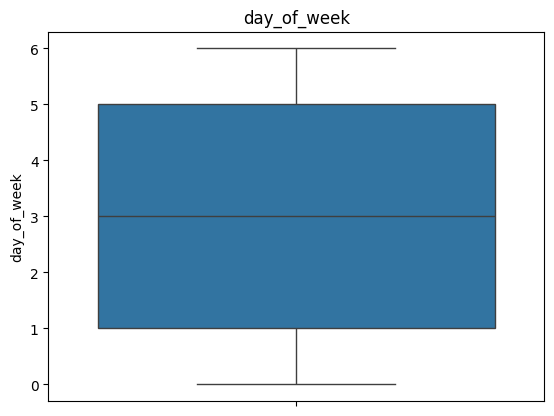

In [13]:
for col in df_corr:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

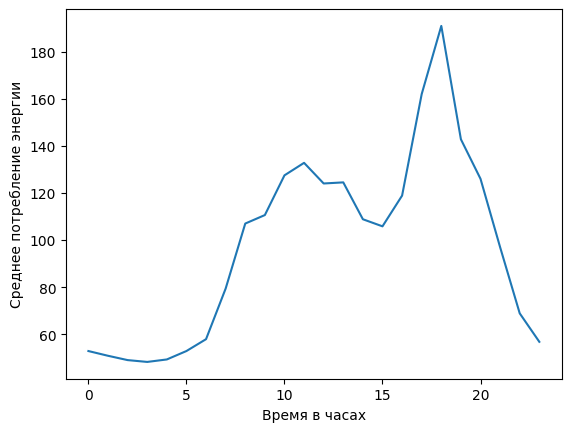

In [14]:
hourly_energy = df.groupby('hour')['Appliances'].mean()
plt.plot(hourly_energy.index, hourly_energy.values)
plt.xlabel('Время в часах')
plt.ylabel('Среднее потребление энергии')
plt.show()

In [15]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month,day,hour,day_of_week
count,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,...,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000
mean,97.681519,3.776567,21.692492,40.252461,20.348018,40.411544,22.276030,39.232780,20.863236,39.019644,...,7.422572,755.512313,79.739117,4.035615,38.308498,3.768491,3.108264,16.052217,11.490614,2.977883
std,102.524416,7.918444,1.610378,3.978589,2.197493,4.074084,2.011906,3.250901,2.047060,4.338527,...,5.321531,7.412500,14.910930,2.443827,11.783314,4.200655,1.340537,8.446614,6.923892,1.987132
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.550000,1.000000,1.000000,0.000000,0.000000
25%,50.000000,0.000000,20.760000,37.333333,18.823333,37.863333,20.790000,36.900000,19.533333,35.500000,...,3.670000,750.900000,70.166667,2.000000,29.000000,0.900000,2.000000,9.000000,5.000000,1.000000
50%,60.000000,0.000000,21.600000,39.633333,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,3.000000,16.000000,12.000000,3.000000
75%,100.000000,0.000000,22.631250,43.060000,21.500000,43.260000,23.323333,41.760000,22.100000,42.133333,...,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,4.000000,23.000000,17.000000,5.000000
max,1070.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,5.000000,31.000000,23.000000,6.000000


In [16]:
'''
df = np.clip(df, lower, upper, axis=1)
'''

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[~((df < lower) | (df > upper)).any(axis=1)]

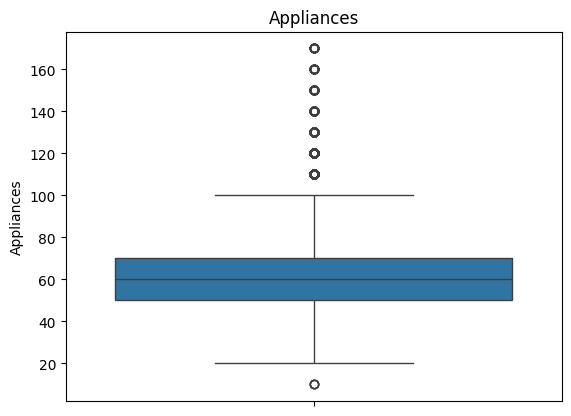

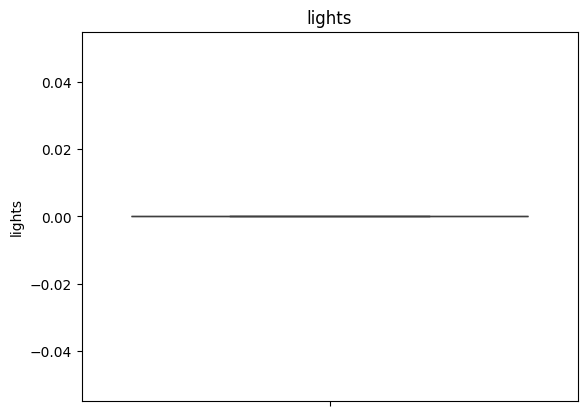

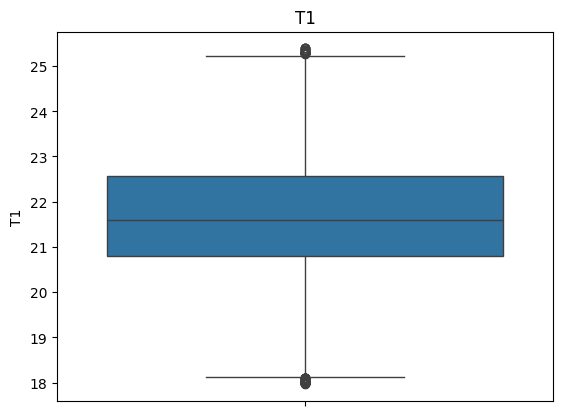

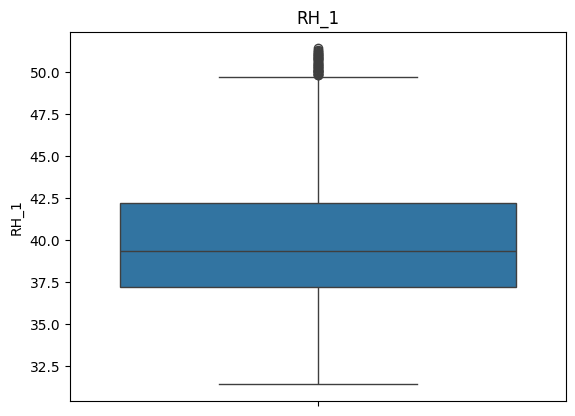

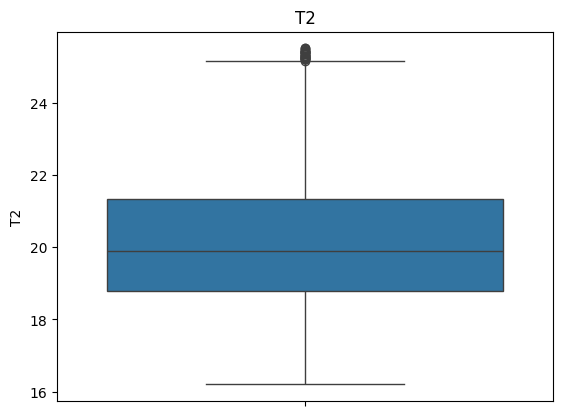

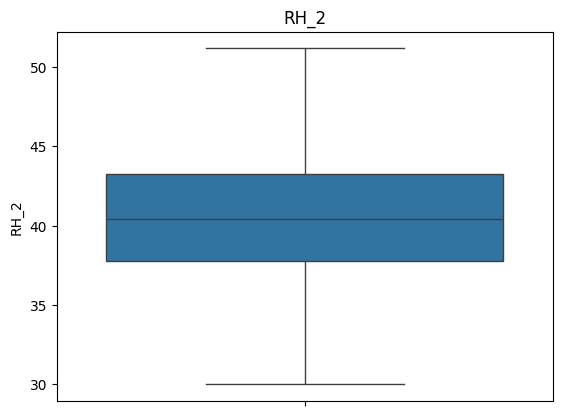

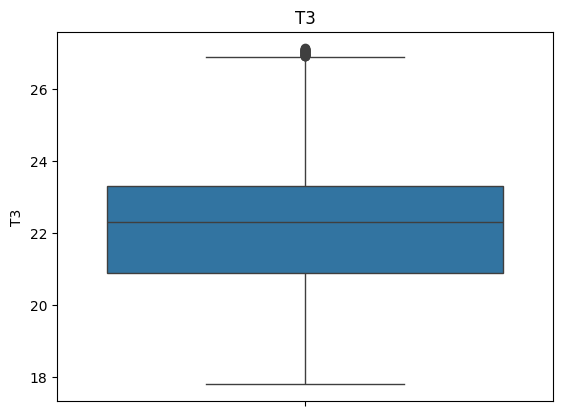

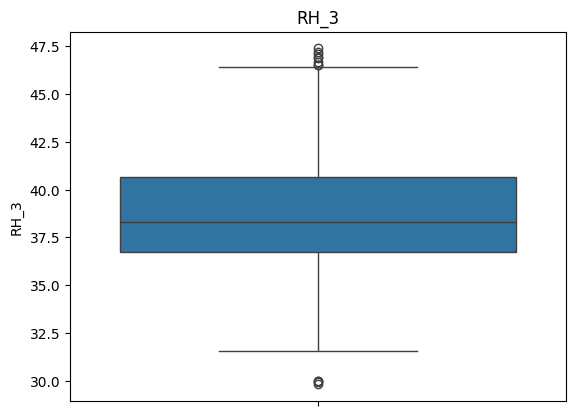

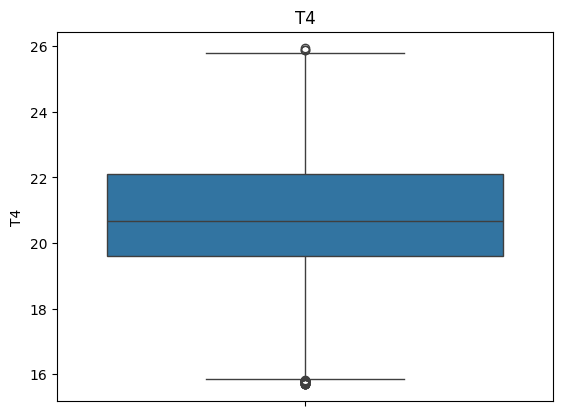

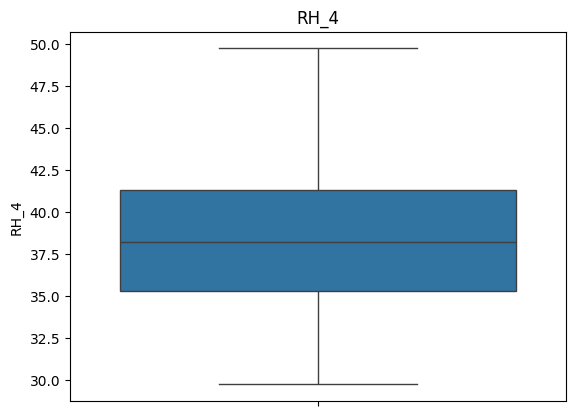

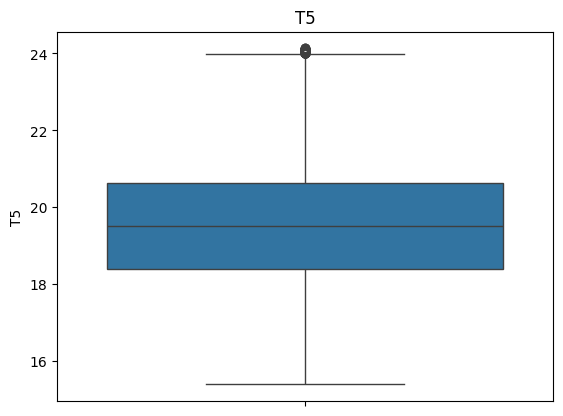

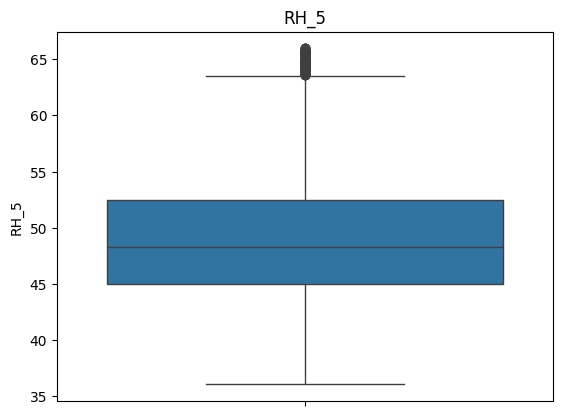

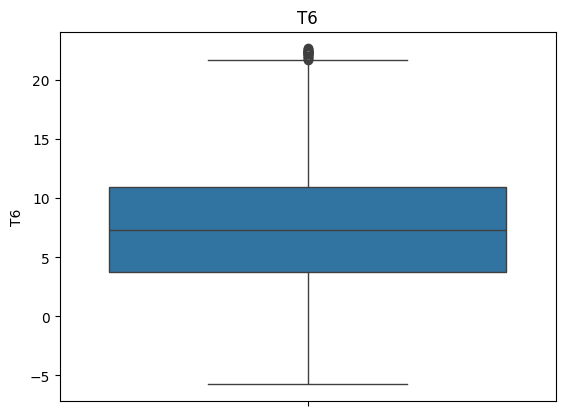

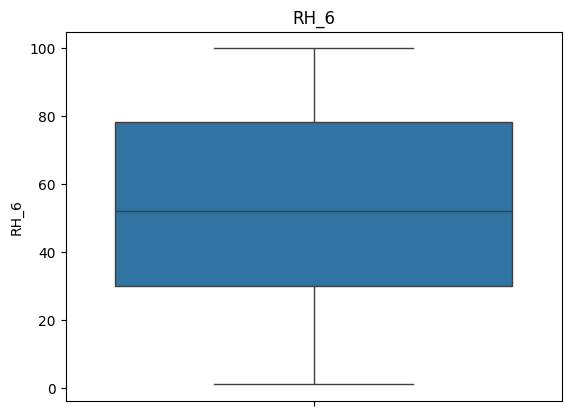

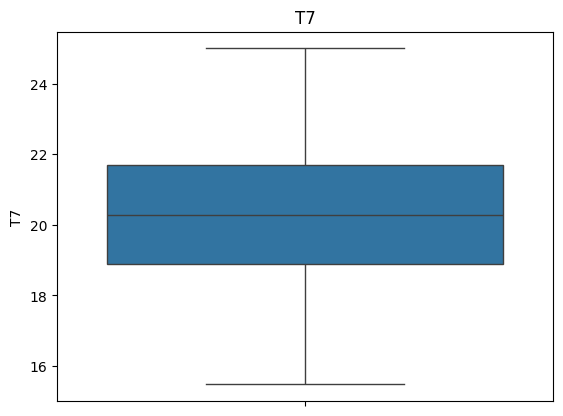

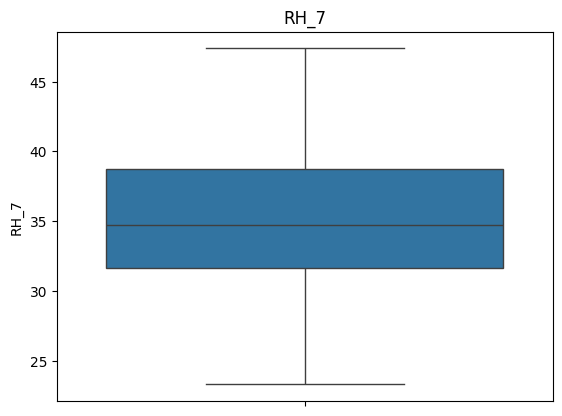

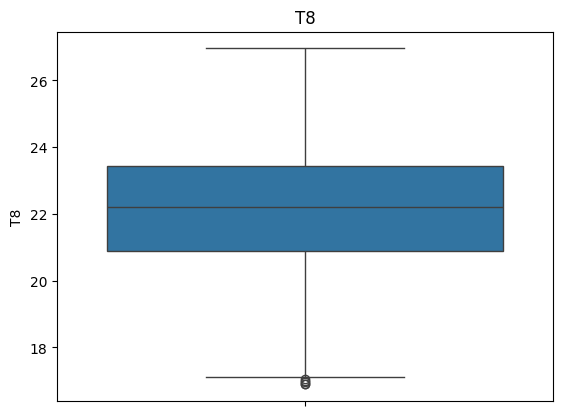

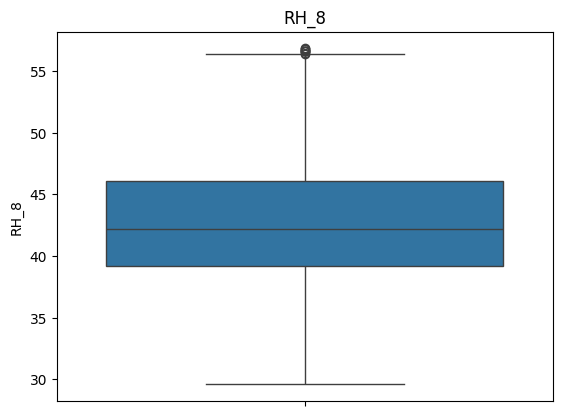

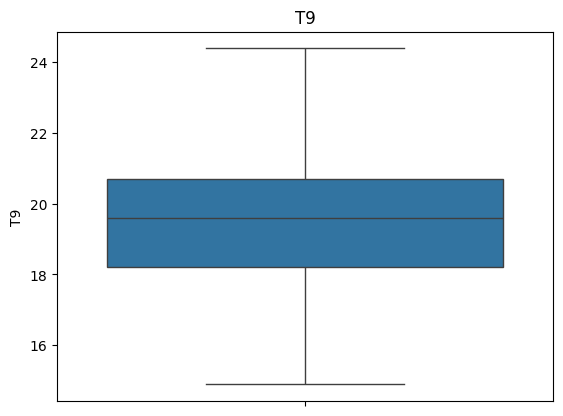

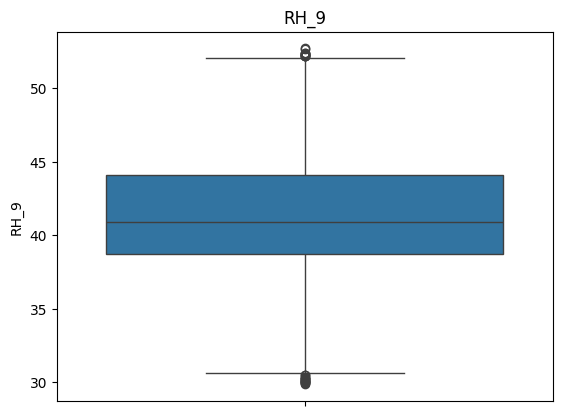

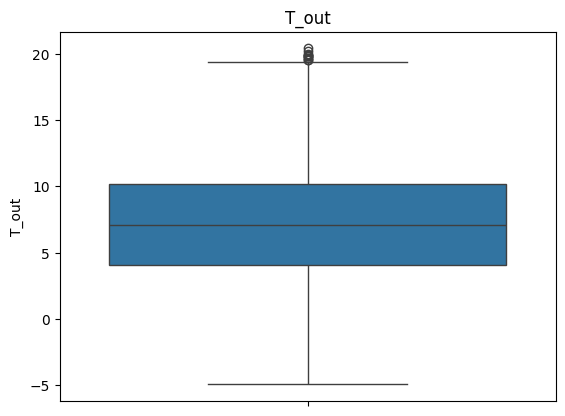

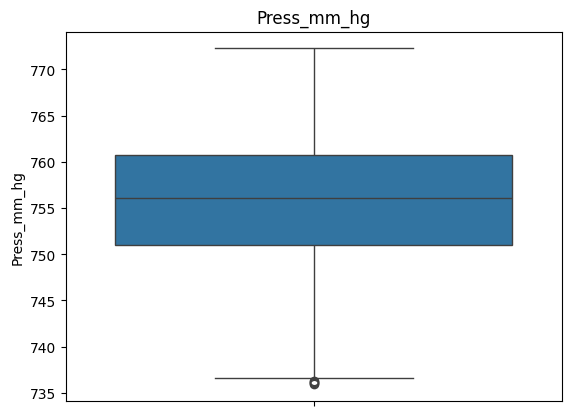

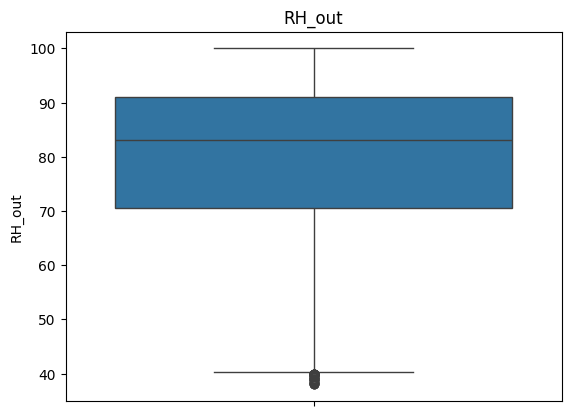

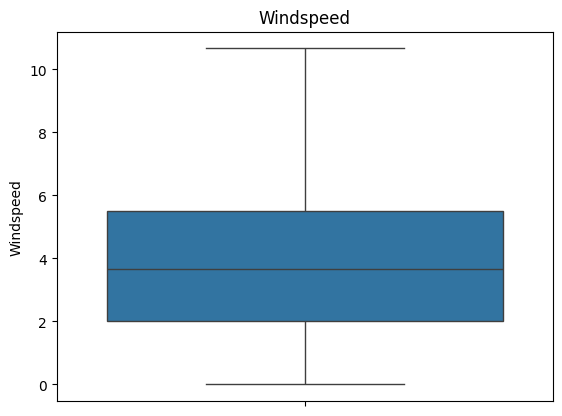

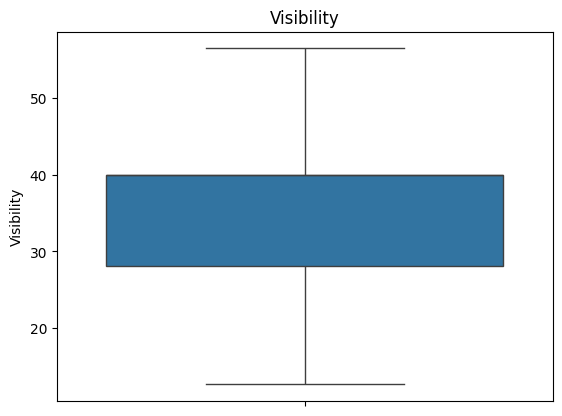

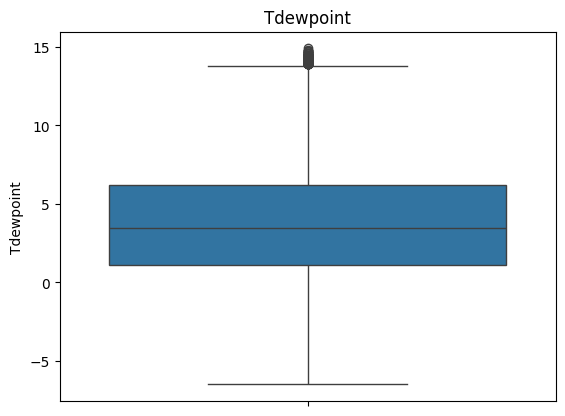

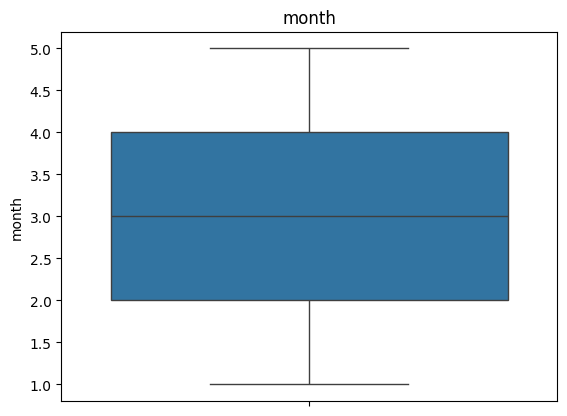

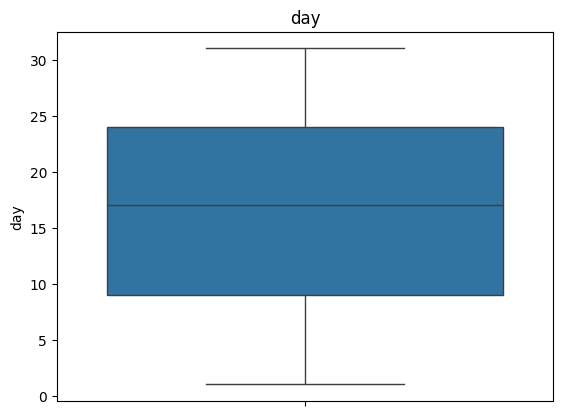

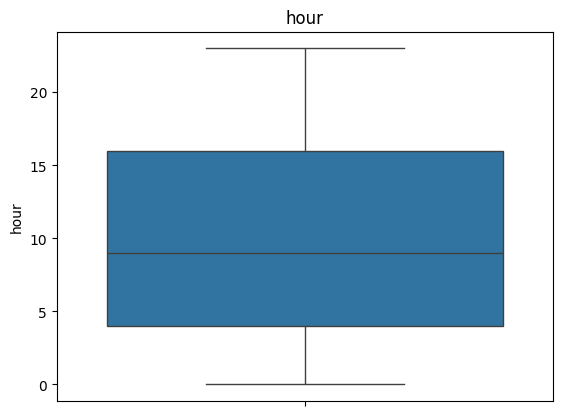

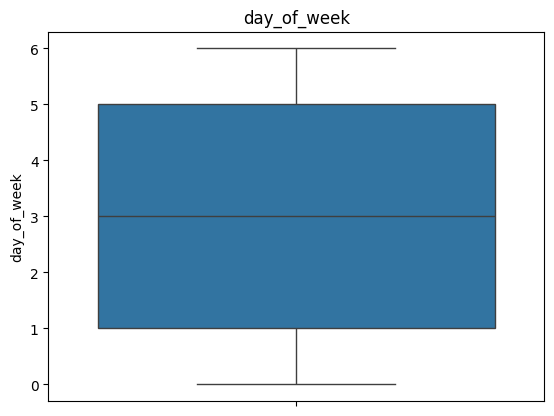

In [17]:
for col in df_corr:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

In [18]:
df['lights'].value_counts()

lights
0    9880
Name: count, dtype: int64

In [19]:
df.drop(columns='lights', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15400\1157750919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='lights', inplace=True)


In [20]:
col_list = list(df)

In [21]:
df.duplicated().sum()

0

In [22]:
df.to_csv('../data/energy_task_upd.csv')

## 2. Выделить целевой признак и предикторы, разбить данные на обучающую и тестовую выборку.

In [586]:
y = df['Appliances']
X = df.drop(['Appliances'], axis=1)

In [587]:
y

date
2016-01-12 01:30:00     50
2016-01-12 01:40:00     40
2016-01-12 01:50:00     50
2016-01-12 02:00:00     40
2016-01-12 02:10:00     50
                      ... 
2016-05-27 06:40:00     50
2016-05-27 07:00:00     50
2016-05-27 07:20:00     60
2016-05-27 07:40:00    130
2016-05-27 08:10:00    100
Name: Appliances, Length: 9880, dtype: int64

In [588]:
X

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month,day,hour,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-12 01:30:00,20.926667,45.590000,20.290000,44.290000,20.166667,45.530000,21.890000,46.966667,19.000000,50.030000,...,5.15,737.900000,92.000000,5.500000,40.000000,3.95,1.0,12.0,1.0,1.0
2016-01-12 01:40:00,20.890000,45.666667,20.230000,44.290000,20.133333,45.500000,21.823333,46.226667,18.926667,50.090000,...,5.17,738.033333,92.000000,5.333333,40.000000,3.97,1.0,12.0,1.0,1.0
2016-01-12 01:50:00,20.890000,46.060000,20.200000,44.400000,20.200000,45.500000,21.666667,46.060000,18.890000,50.090000,...,5.18,738.166667,92.000000,5.166667,40.000000,3.98,1.0,12.0,1.0,1.0
2016-01-12 02:00:00,20.790000,46.200000,20.200000,44.466667,20.166667,45.500000,21.533333,45.933333,18.890000,50.172500,...,5.20,738.300000,92.000000,5.000000,40.000000,4.00,1.0,12.0,2.0,1.0
2016-01-12 02:10:00,20.790000,46.200000,20.100000,44.530000,20.125000,45.425000,21.356667,45.900000,18.890000,50.200000,...,5.13,738.400000,92.000000,4.833333,40.000000,3.93,1.0,12.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 06:40:00,24.000000,45.560000,22.277143,46.608571,26.100000,39.700000,24.290000,42.560000,22.390000,54.930000,...,13.40,755.700000,89.000000,1.333333,47.333333,11.60,5.0,27.0,6.0,4.0
2016-05-27 07:00:00,24.000000,45.400000,22.361429,46.428571,25.926667,39.530000,24.290000,42.590000,22.390000,54.430000,...,13.50,755.800000,89.000000,1.000000,48.000000,11.70,5.0,27.0,7.0,4.0
2016-05-27 07:20:00,24.000000,45.490000,22.390000,46.290000,25.790000,39.433333,24.290000,42.700000,22.390000,53.966667,...,13.70,755.800000,88.000000,1.333333,50.333333,11.70,5.0,27.0,7.0,4.0


In [589]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# указав параметр test_size = 0.2 получим, что 20% данных уйдут в тестовую выборку
# также в функцию можно передать параметр shuffle: по умолчанию функция рандомно
# перемешивает данные; поэтому и модели будут получаться разные;
# задайте параметр shuffle = False, если не хотите перемешивать

In [590]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7904, 28), (7904,), (1976, 28), (1976,))

In [591]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt

def metrics(actual, pred):
  return {
    'MAE': mean_absolute_error(actual, pred),
    'MSE': mean_squared_error(actual, pred),
    'RMSE': sqrt(mean_squared_error(actual, pred)),
    'MAPE': mean_absolute_percentage_error(actual, pred),
    'R^2': r2_score(actual, pred)
  }
models = dict()

## 3. Решить задачу регрессии на ваших данных с использованием моделей sklearn (простая линейная регрессия + L1, L2; множественная линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр.

In [592]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
models['LinearRegression'] = metrics(y_test, y_pred)

metrics(y_test, y_pred)

{'MAE': 15.199302448946161,
 'MSE': 456.1838939408886,
 'RMSE': 21.358461881439137,
 'MAPE': 0.26911765363331575,
 'R^2': 0.3139356384315749}

In [593]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'alpha': np.arange(0, 1, 0.1)}

In [594]:
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
# выводим оптимальные значения параметров
ridge_optimal.best_params_

{'alpha': 0.9}

In [595]:
lasso_optimal = RandomizedSearchCV(Lasso(), parameters).fit(X_train, y_train)
# выводим оптимальные значения параметров
lasso_optimal.best_params_

c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.372e+06, tolerance: 4.021e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_d

{'alpha': 0.0}

In [596]:
# L1
ridge = Ridge(alpha=0.9).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
models['Ridge'] = metrics(y_test, y_pred)

metrics(y_test, y_pred)

{'MAE': 15.199535242160781,
 'MSE': 456.19032870636886,
 'RMSE': 21.358612518288,
 'MAPE': 0.2691241118324771,
 'R^2': 0.31392596105512727}

In [597]:
# L2
lasso = Lasso(alpha=0.0).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
models['Lasso'] = metrics(y_test, y_pred)

metrics(y_test, y_pred)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.695e+06, tolerance: 5.013e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_d

{'MAE': 15.19994428837005,
 'MSE': 456.2030977977141,
 'RMSE': 21.358911437564277,
 'MAPE': 0.26913220825501033,
 'R^2': 0.3139067573554395}

##4. Решить задачу регрессии на ваших данных с использованием моделей sklearn (Полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр.

In [598]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

Input = [('standardscaler', StandardScaler()), ('polynomial', PolynomialFeatures(2, include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X)
models['PolynomialFeatures'] = metrics(y, y_pred)

metrics(y, y_pred)

{'MAE': 12.083189471828652,
 'MSE': 289.8008294374205,
 'RMSE': 17.023537512439077,
 'MAPE': 0.21988414325023253,
 'R^2': 0.5475518519338499}

## 5. Вычислить значения метрик R2, MAE, MSE, RMSE, MAPE для всех обученных моделей. Выбрать лучшую модель.

In [599]:
actual = np.random.randn(5)
pred = np.random.randn(5)

actual, pred

(array([-0.37590184,  1.02745442, -0.76932925, -2.72076431, -0.27994376]),
 array([-1.74793808, -0.83678621,  0.74479554,  1.88194928,  1.76420432]))

**MSE - cреднеквадратическая ошибка**

In [600]:
def MSE(actual, pred):
    return np.mean((actual - pred)**2)

In [601]:
MSE(actual, pred), mean_squared_error(actual, pred)

(6.602792843132297, 6.602792843132297)

**R2 - коэфициент детерминации**

In [602]:
def R2(actual, pred):
    SSR = sum((actual - pred)**2)
    SST = sum((actual - np.mean(actual))**2)
    return 1 - (SSR / SST)

In [603]:
R2(actual, pred), r2_score(actual, pred)

(-3.507167484357958, -3.507167484357958)

**RMSE - корень из среднеквадратичной ошибки**

In [604]:
def RMSE(actual, pred):
    return np.sqrt(MSE(actual, pred))

In [605]:
RMSE(actual, pred), sqrt(mean_squared_error(actual, pred))

(2.5695900146000525, 2.5695900146000525)

**MAE - cредняя абсолютная ошибка**

In [606]:
def MAE(actual, pred):
    return np.mean(np.abs((actual - pred)))

In [607]:
MAE(actual, pred), mean_absolute_error(actual, pred)

(2.279452666971742, 2.279452666971742)

**MAPE - средняя абсолютная процентная погрешность**

In [608]:
def MAPE(actual, pred):
    return np.mean(np.abs((actual - pred) / actual))

In [609]:
MAPE(actual, pred), mean_absolute_percentage_error(actual, pred)

(3.2852433226587165, 3.2852433226587165)

## 6. Реализовать пайплайн при построении модели регрессии.

## 7. *Самостоятельно реализовать вычисление всех используемых метрик (в виде функций, принимающих два аргумента). Привести в таблице метрики, вычисленные с использование библиотеки Scikit-learn и соответствующими пользовательскими функциями.

## 8. Решить задачу регрессии на ваших данных с использованием моделей sklearn (простая линейная регрессия + L1, L2, ElasticNet; множественная линейная регрессия + L1, L2, ElasticNet), для моделей с регуляризациями подберите гиперпараметр. Применить горячее кодирование (Pandas).

In [610]:
from sklearn.linear_model import ElasticNet

param_grid = {'alpha':[0.1,1,10,100],'l1_ratio':[0.1,0.75,0.99,1]}
grid_model = GridSearchCV(ElasticNet(max_iter=100000),
                          param_grid=param_grid,
                          scoring = 'r2',
                          cv = 5, verbose = 2)

In [611]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.1, l

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.75, 0.99, 1]},
             scoring='r2', verbose=2)

In [612]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [613]:
base_elastic_model = ElasticNet(alpha=0.1, l1_ratio=1)
base_elastic_model.fit(X_train, y_train)
y_pred = base_elastic_model.predict(X_test)
models['ElasticNet'] = metrics(y_test, y_pred)

metrics(y_test, y_pred)

{'MAE': 15.273961321596301,
 'MSE': 459.03083562336946,
 'RMSE': 21.42500491536395,
 'MAPE': 0.27091082927797216,
 'R^2': 0.3096540641503337}

## 9. Вычислить значения метрик R2, MAE, MSE, RMSE, MAPE для всех обученных моделей. Выбрать лучшую модель.

In [614]:
from pprint import pprint

pprint(models)

{'ElasticNet': {'MAE': 15.273961321596301,
                'MAPE': 0.27091082927797216,
                'MSE': 459.03083562336946,
                'RMSE': 21.42500491536395,
                'R^2': 0.3096540641503337},
 'Lasso': {'MAE': 15.19994428837005,
           'MAPE': 0.26913220825501033,
           'MSE': 456.2030977977141,
           'RMSE': 21.358911437564277,
           'R^2': 0.3139067573554395},
 'LinearRegression': {'MAE': 15.199302448946161,
                      'MAPE': 0.26911765363331575,
                      'MSE': 456.1838939408886,
                      'RMSE': 21.358461881439137,
                      'R^2': 0.3139356384315749},
 'PolynomialFeatures': {'MAE': 12.083189471828652,
                        'MAPE': 0.21988414325023253,
                        'MSE': 289.8008294374205,
                        'RMSE': 17.023537512439077,
                        'R^2': 0.5475518519338499},
 'Ridge': {'MAE': 15.199535242160781,
           'MAPE': 0.2691241118324771,
       